In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [2]:
trainset = pd.read_csv(r"C:\Users\Rahul\train.csv")
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
testset = pd.read_csv(r"C:\Users\Rahul\Downloads\test.csv")
testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
sample_submission = pd.read_csv(r"C:\Users\Rahul\Downloads\sample_submission.csv")
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [15]:
obj_attribute =trainset.select_dtypes(include='object')
obj_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

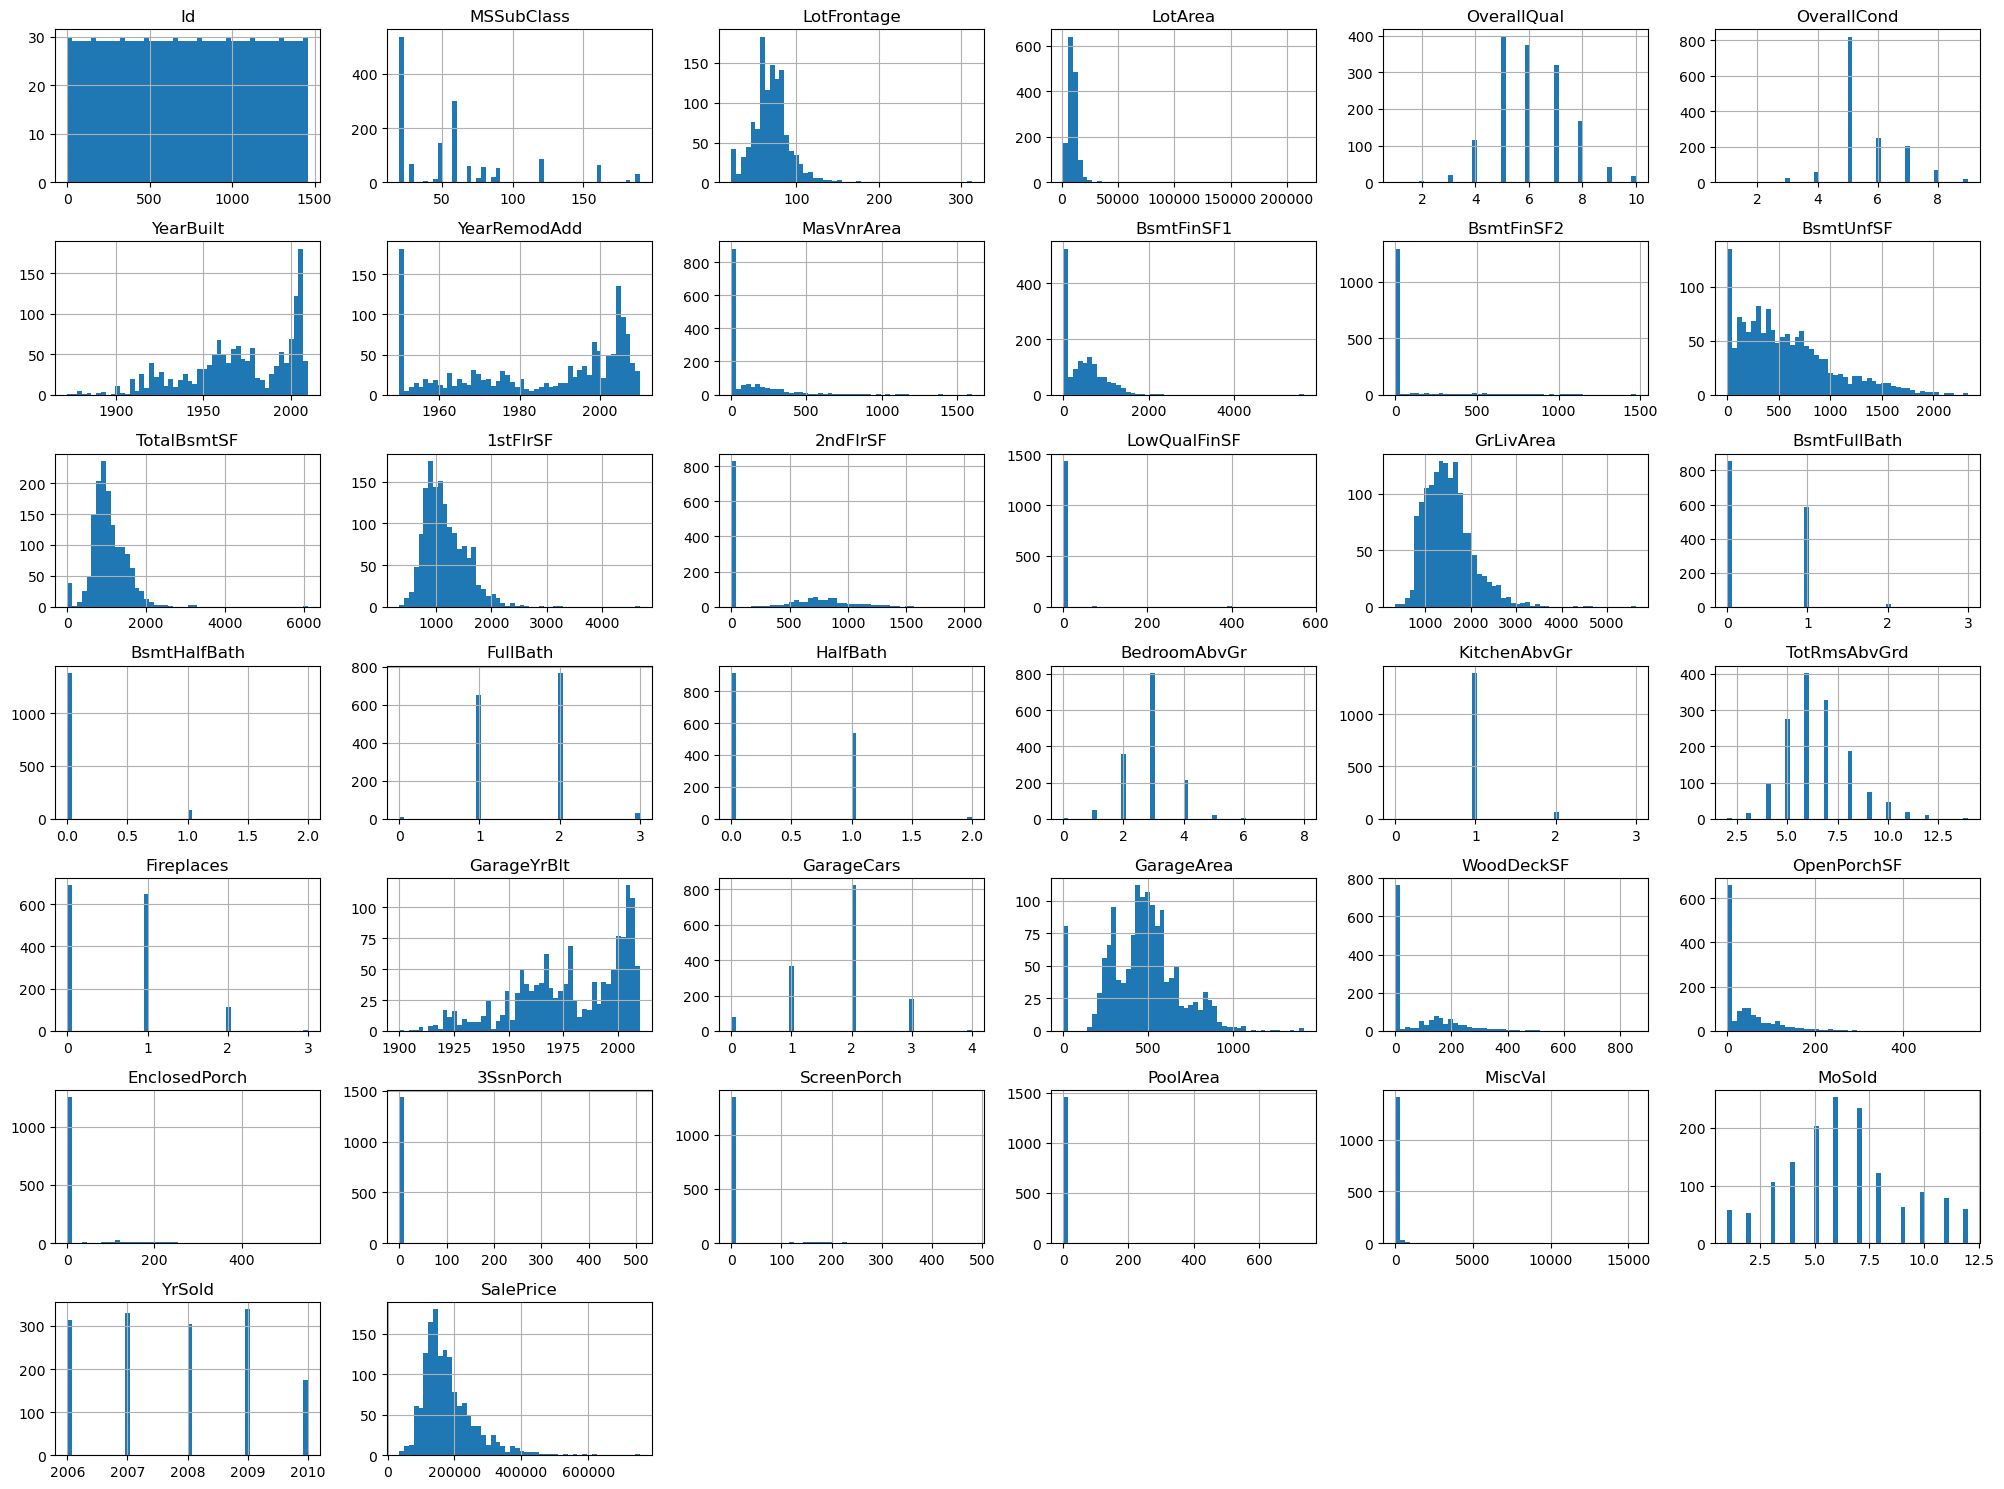

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
trainset.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [17]:
num_attributes = trainset.select_dtypes(include=['int64','float64'])
num_attributes.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

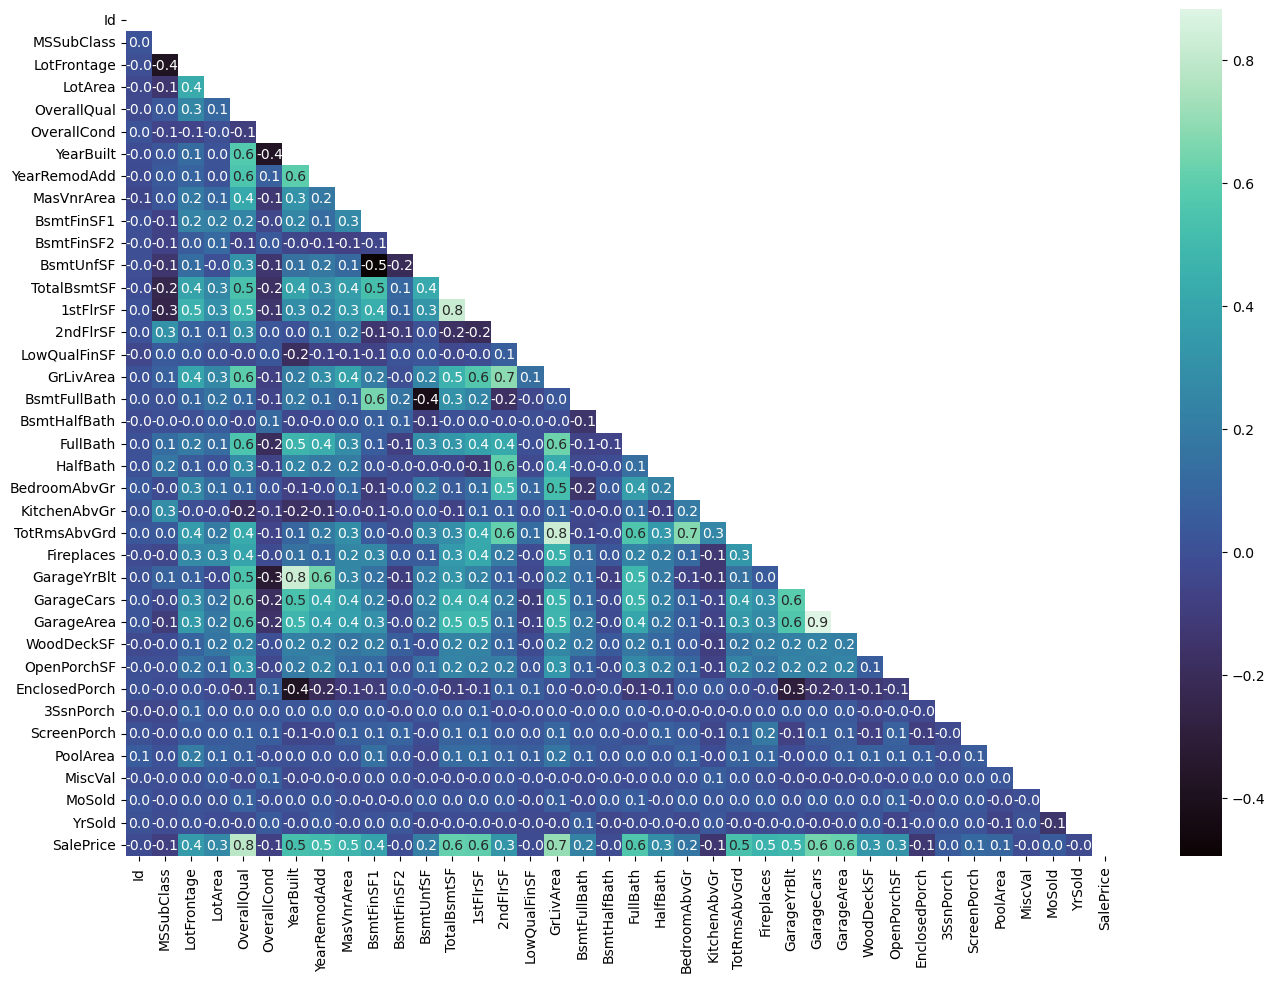

In [18]:
plt.figure(figsize=(16,11))

correlation_matrix=num_attributes.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True,
            mask=mask, cmap='mako',
            fmt='.1f', cbar=True)

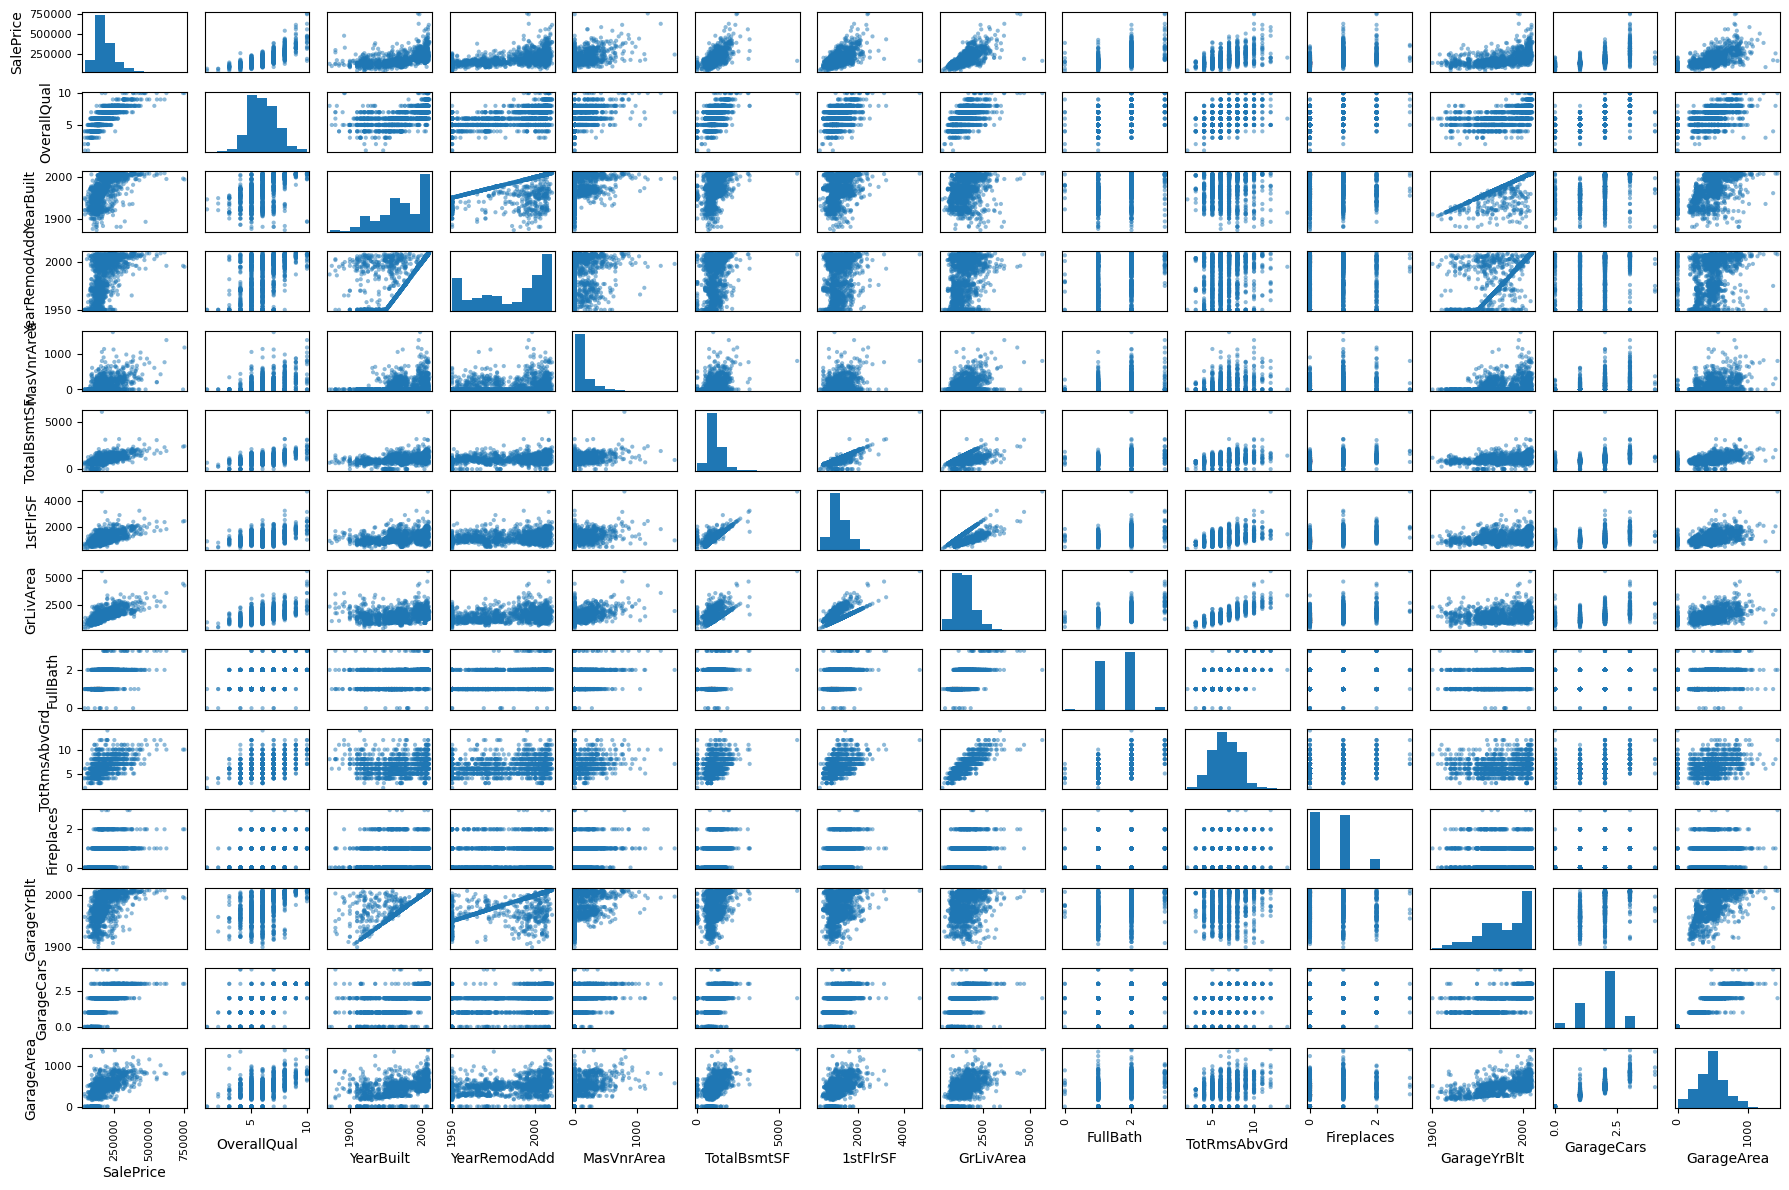

In [19]:
imp_attributes = ['SalePrice','OverallQual', 'YearBuilt','YearRemodAdd', 'MasVnrArea','TotalBsmtSF','1stFlrSF',
                  'GrLivArea', 'FullBath','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']

from pandas.plotting import scatter_matrix
scatter_matrix(trainset[imp_attributes], figsize=(18, 12))

plt.tight_layout()
plt.show()

In [20]:
y = trainset.SalePrice
X = trainset.drop(labels='SalePrice', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.impute import SimpleImputer
def missing_numerical(X_train):
    imputer = SimpleImputer(strategy="median") #a. creating imputer instance

    X_num = X_train.select_dtypes(include=['int64','float64']) #choosing num attributes
    imputer.fit(X_num) #b. fitting
    # It computed the mean of each attribute and stored the result in statistics_ instance variable

    X = imputer.transform(X_num) #c. transformed the data as per requirement and generated a plain np array
    train_X = pd.DataFrame(X, columns=X_num.columns)
    return train_X
train_X = missing_numerical(X_train)
val_X = missing_numerical(X_val)

In [23]:

from sklearn.preprocessing import OneHotEncoder
obj_encoder = OneHotEncoder() #a.making onehotencoder object
housing_1hot = obj_encoder.fit_transform(obj_attribute) #b.fitting and transforming in one go
housing_1hot

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

In [24]:
#choosing the attributes we worked on earlier
imp_attributes.remove('SalePrice')
train_X_imp = train_X[imp_attributes]
val_X_imp = val_X[imp_attributes]

In [25]:
dict_mse={}

In [26]:
from sklearn.metrics import mean_squared_error

def model_application(model, model_name, train_X, y_train, val_X, y_val):
    model.fit(train_X, y_train)

    predictions = model.predict(val_X)

    mse = mean_squared_error(y_val, predictions)
    dict_mse[model_name] = np.sqrt(mse)
    dict_mse[model_name]
    return model  #returning trained model


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = model_application(lr_model, 'Linear Regression for important attributes', train_X_imp, y_train, val_X_imp, y_val)
lr_model_imp = LinearRegression()
lr_model = model_application(lr_model_imp, 'Linear Regression', train_X, y_train, val_X, y_val)

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg = model_application(tree_reg, 'Decision Tree Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)
tree_reg_imp = DecisionTreeRegressor()
tree_reg = model_application(tree_reg_imp, 'Decision Tree Regressor', train_X, y_train, val_X, y_val)

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = model_application(forest_reg, 'Random Forest Regressor', train_X, y_train, val_X, y_val)
forest_reg_imp = RandomForestRegressor()
forest_reg_imp = model_application(forest_reg_imp, 'Random Forest Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)

In [32]:
from sklearn.xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg = model_application(xgb_reg, 'XGBoost Regressor', train_X, y_train, val_X, y_val)
xgb_reg_imp = XGBRegressor()
xgb_reg_imp = model_application(xgb_reg_imp, 'XGBoost Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)

ModuleNotFoundError: No module named 'sklearn.xgboost'

In [33]:
dict_mse

{'Linear Regression for important attributes': 48558.54873774273,
 'Linear Regression': 51003.01888818689,
 'Decision Tree Regressor for important attributes': 46966.180546913114,
 'Decision Tree Regressor': 42544.527368313196,
 'Random Forest Regressor': 33281.84516041802,
 'Random Forest Regressor for important attributes': 35257.078101335144}

In [34]:
def display_scores(scores):
    print("Individual Error Scores:", scores)
    print("Mean error:", scores.mean())
    print("Standard deviation:", scores.std())


from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_X, y_train,
                         scoring="neg_mean_squared_error", cv=10)
cv_rmse_scores = np.sqrt(-scores)

display_scores(cv_rmse_scores)

Individual Error Scores: [28422.31925948 27595.93586679 25800.02570088 28955.15271997
 24555.09531451 28128.12233174 50599.23145711 37912.42701698
 22864.30847928 22808.69025469]
Mean error: 29764.130840143025
Standard deviation: 8057.062296613786


### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,40,50],
      'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_X, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=50)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

39721.88931587126 {'max_features': 2, 'n_estimators': 3}
34556.533062058494 {'max_features': 2, 'n_estimators': 10}
31631.909993353143 {'max_features': 2, 'n_estimators': 30}
32080.179131604502 {'max_features': 2, 'n_estimators': 40}
31863.65749575482 {'max_features': 2, 'n_estimators': 50}
36244.45998944687 {'max_features': 4, 'n_estimators': 3}
32410.11650546231 {'max_features': 4, 'n_estimators': 10}
30413.942188013512 {'max_features': 4, 'n_estimators': 30}
30659.143272594876 {'max_features': 4, 'n_estimators': 40}
30209.4985358636 {'max_features': 4, 'n_estimators': 50}
38765.60672460036 {'max_features': 6, 'n_estimators': 3}
31141.34781454021 {'max_features': 6, 'n_estimators': 10}
30351.809709569243 {'max_features': 6, 'n_estimators': 30}
29776.46263248874 {'max_features': 6, 'n_estimators': 40}
30005.292440927216 {'max_features': 6, 'n_estimators': 50}
34818.93173664103 {'max_features': 8, 'n_estimators': 3}
32565.3068562142 {'max_features': 8, 'n_estimators': 10}
29949.4654257

In [41]:
test_X = missing_numerical(testset) #dealing with numerical missing values
test_X_imp = test_X[imp_attributes]

my_result = forest_reg.predict(test_X) #predicting

# Saving the result into submission file
submission = pd.read_csv(r"C:\Users\Rahul\Downloads\sample_submission.csv")
submission["SalePrice"] = my_result
submission.to_csv('submission.csv', index=False)